In [175]:
import numpy as np
import matplotlib.pyplot as plt
import sys # For saving test data set

In [176]:
"""
Generate test data set starting from a known linear function
synthetic data = (x, trueWeight * x + trueBias + noise)
"""

dataSetX = np.arange(35)
trueWeight, trueBias = 1.3, 0.7
noiseLevel = 6.5
dataSetY = (trueWeight * dataSetX + trueBias) + (noiseLevel * np.random.randn(len(dataSetX)))

In [ ]:
"""
Define architecture
"""

def f_wb(w, b, x):
    return w*x + b

def JCost(w, b):
    return sum((f_wb(w, b, dataSetX) - dataSetY))**2 / (2*len(dataSetX))
    
def weightDerivative(w, b):
    return sum((f_wb(w, b, dataSetX) - dataSetY) * dataSetX) / len(dataSetX)
    
def biasDerivative(w, b):
    return sum((f_wb(w, b, dataSetX) - dataSetY)) / len(dataSetX)
    
def gradientDescent(alpha):
    w, b = 0, 0
    iter, cost = 0, float("inf")
    tolerance = len(dataSetX) * noiseLevel / 10000
    print(iter, tolerance)
    while (iter < 10000):
        temp_w = w - alpha * weightDerivative(w, b)
        temp_b = b - alpha * biasDerivative(w, b)
        w, b = temp_w, temp_b
        cost = JCost(w, b)
        iter += 1
    return w, b, cost

In [178]:
"""
Run ML model
"""

w, b = gradientDescent(0.0001)

0 0.02275


True (w, b): (1.30, 0.70)
Prediction (w, b): (1.35, 0.92)


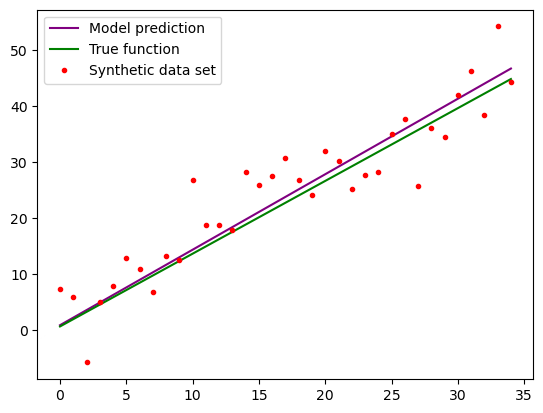

In [ ]:
"""
Display results
"""

print(f"True (w, b): ({trueWeight:.2f}, {trueBias:.2f})")
print(f"Prediction (w, b): ({w:.2f}, {b:.2f})")
print(f"Cost: {cost}")

plt.plot(dataSetX, w * dataSetX + b, 'purple', label="Model prediction")
plt.plot(dataSetX, trueWeight * dataSetX + trueBias, 'g', label = "True function")
plt.plot(dataSetX, dataSetY, 'r.', label = "Synthetic data set")
plt.legend()
plt.show()